In [1]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv("/workspaces/api-open/training.csv")

# Display the DataFrame
print(df)

       RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
0          1         0  12/7/2009   ADESA     2006           3      MAZDA   
1          2         0  12/7/2009   ADESA     2004           5      DODGE   
2          3         0  12/7/2009   ADESA     2005           4      DODGE   
3          4         0  12/7/2009   ADESA     2004           5      DODGE   
4          5         0  12/7/2009   ADESA     2005           4       FORD   
...      ...       ...        ...     ...      ...         ...        ...   
72978  73010         1  12/2/2009   ADESA     2001           8    MERCURY   
72979  73011         0  12/2/2009   ADESA     2007           2  CHEVROLET   
72980  73012         0  12/2/2009   ADESA     2005           4       JEEP   
72981  73013         0  12/2/2009   ADESA     2006           3  CHEVROLET   
72982  73014         0  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel  ...  \
0              

In [2]:
# Count the number of missing values in each column
missing_values_per_column = df.isna().sum()

# Print the count of missing values in each column
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePri

In [3]:
# Get the data types of values in each column
column_value_types = df.dtypes

# Print the data types of values in each column
print("Value types in each column:")
print(column_value_types)

Value types in each column:
RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPri

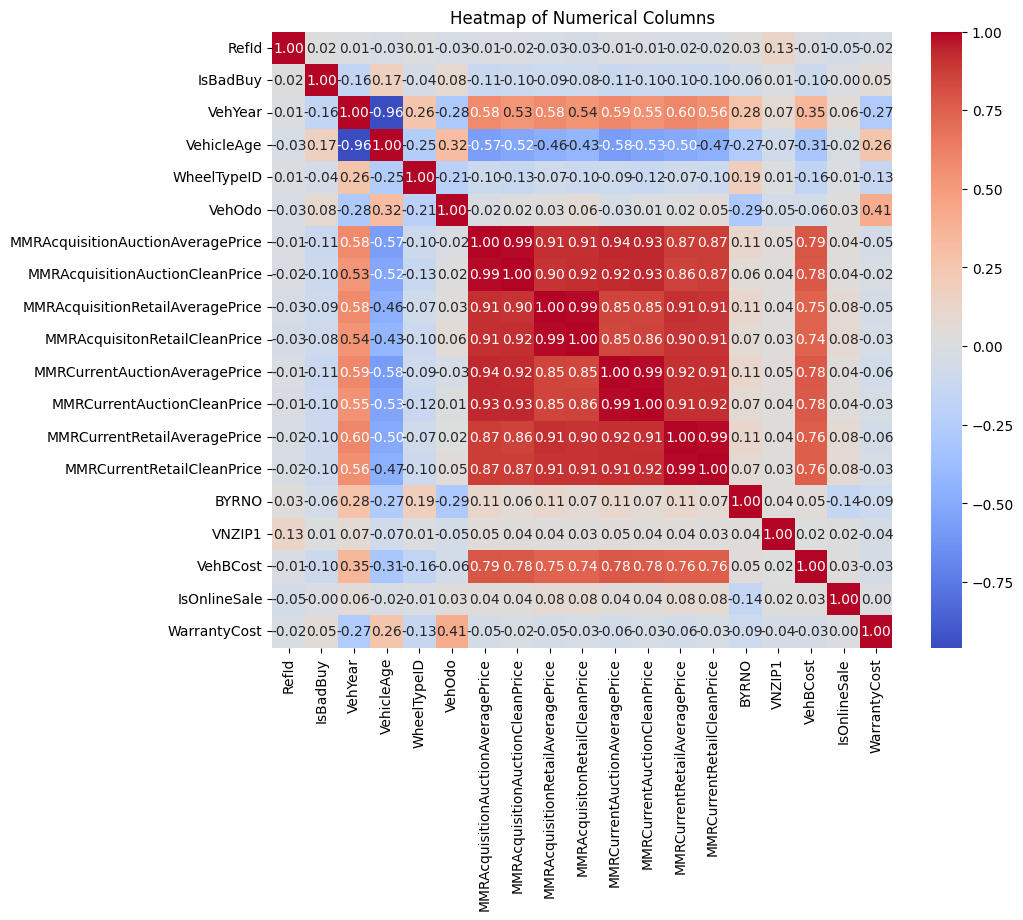

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Numerical Columns")
plt.show()

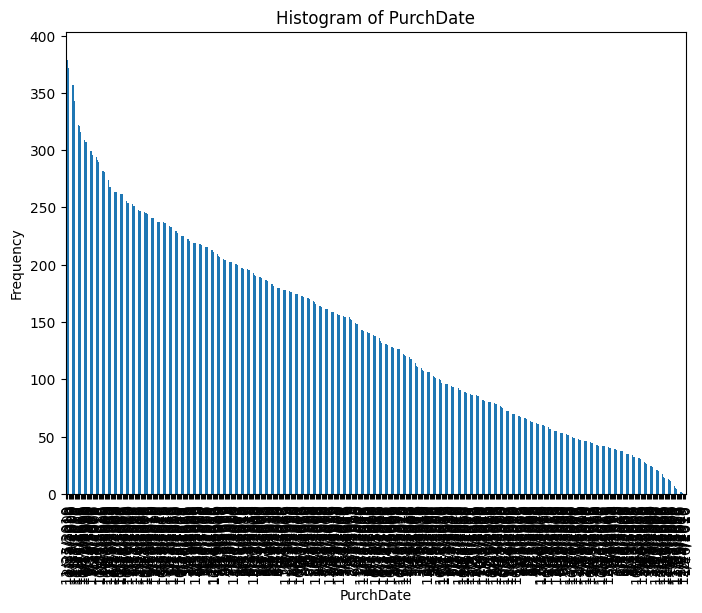

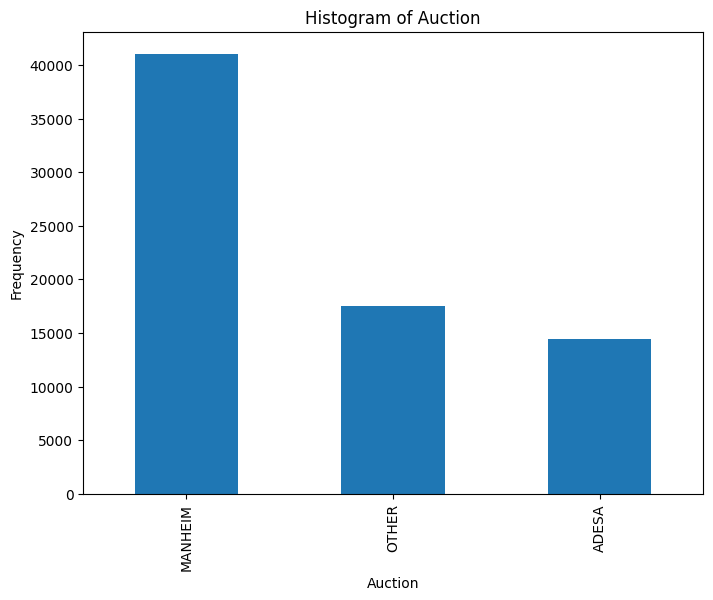

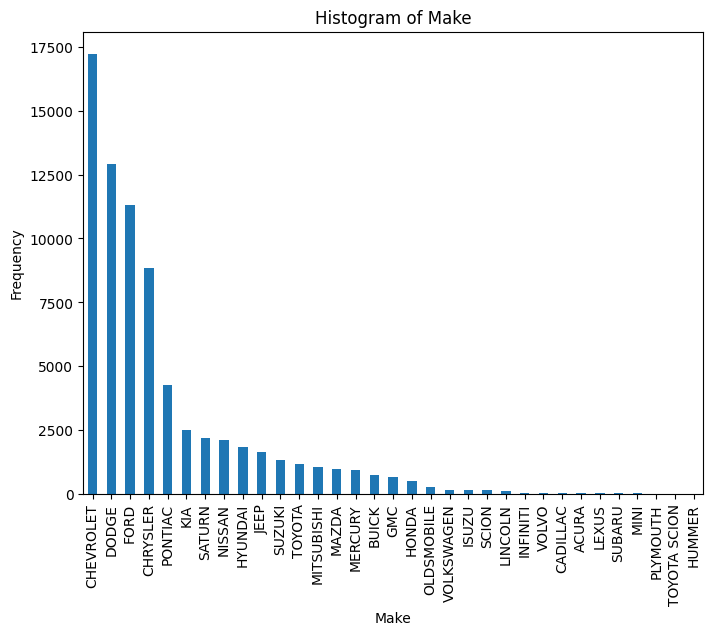

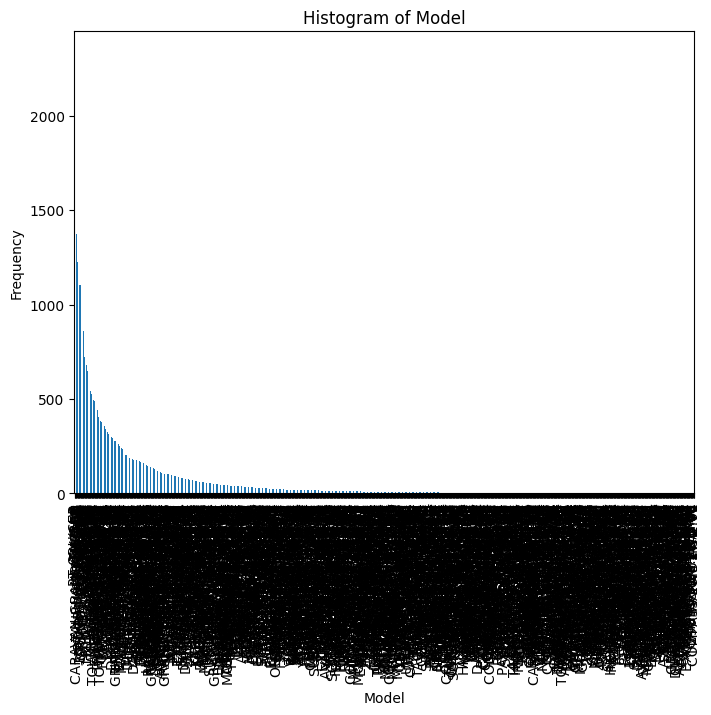

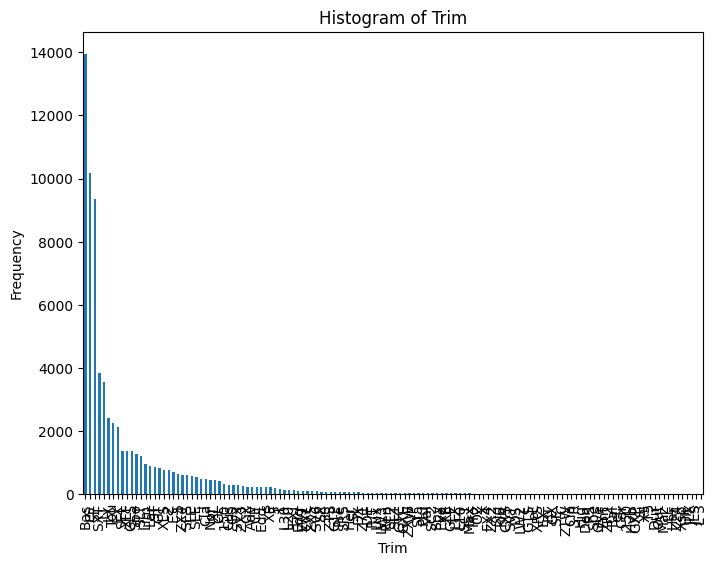

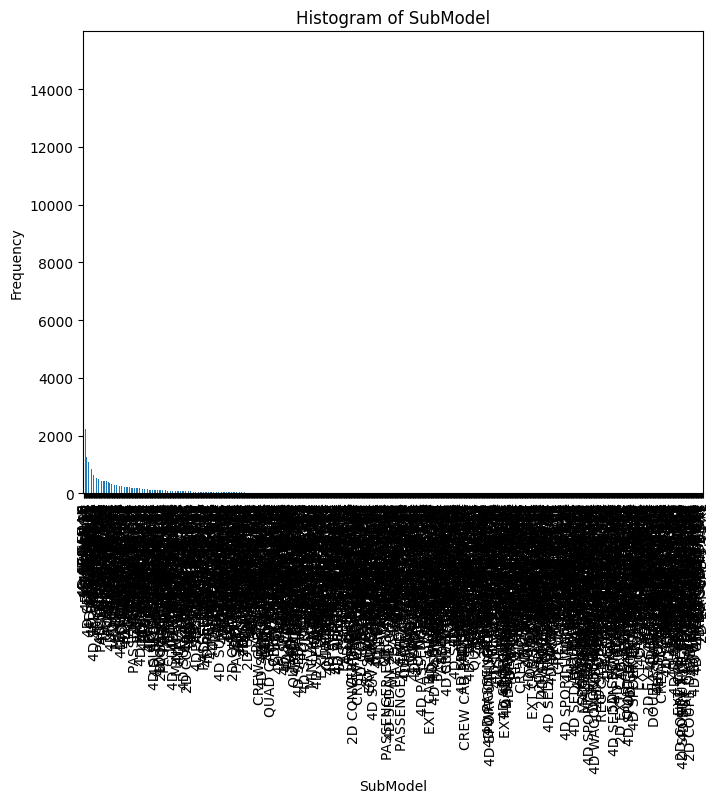

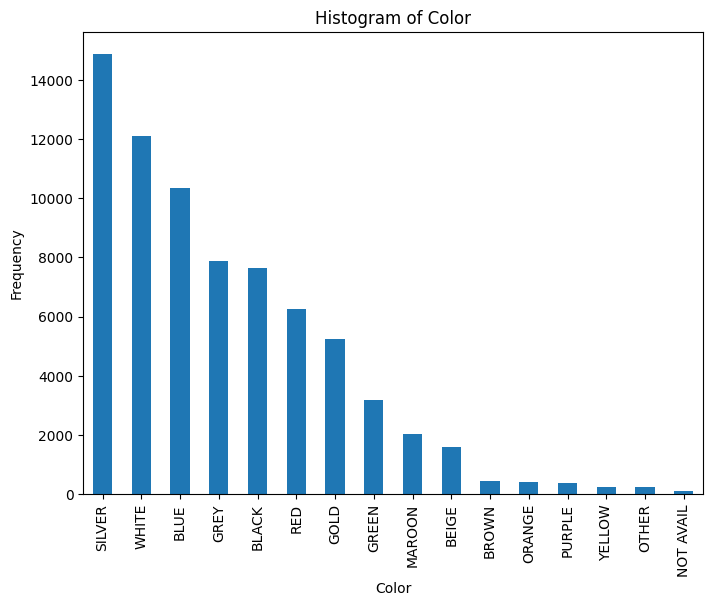

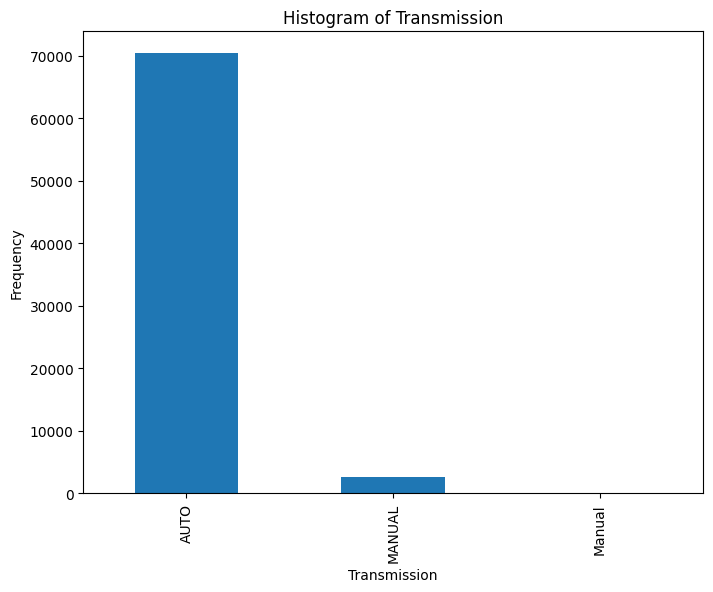

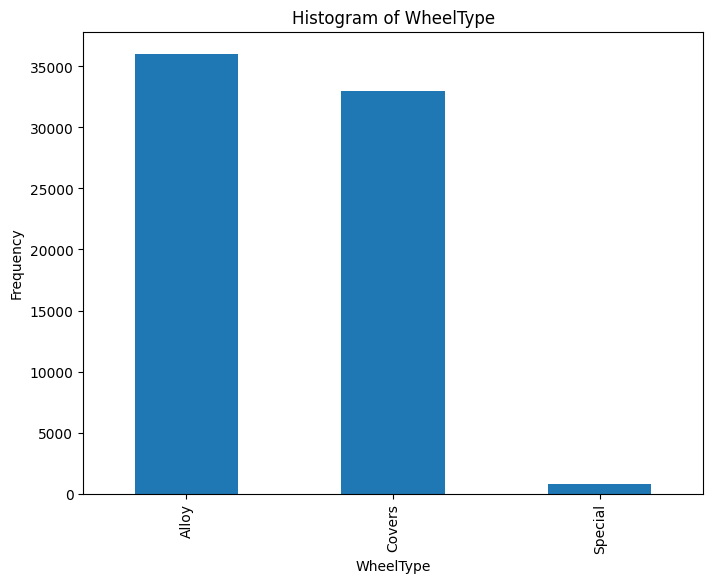

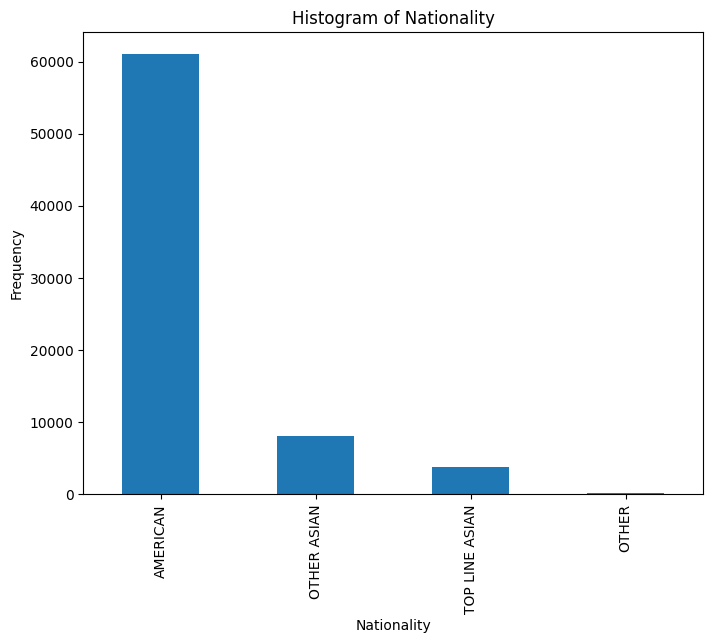

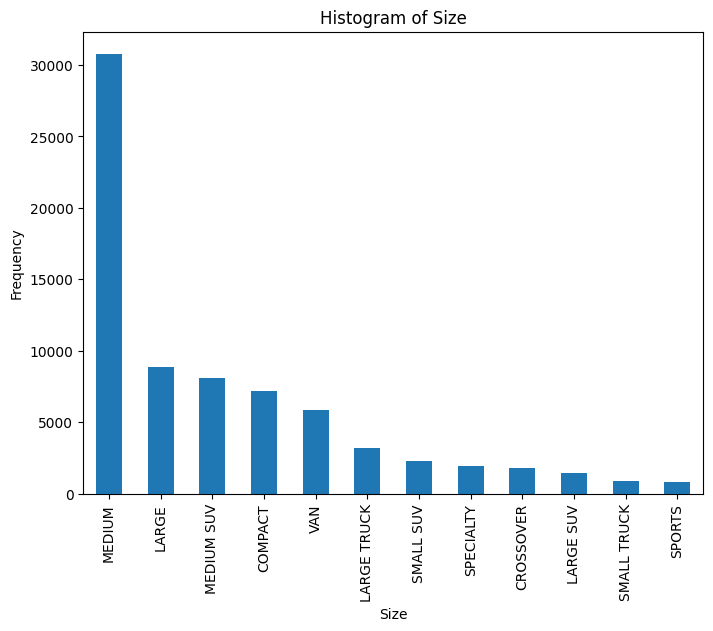

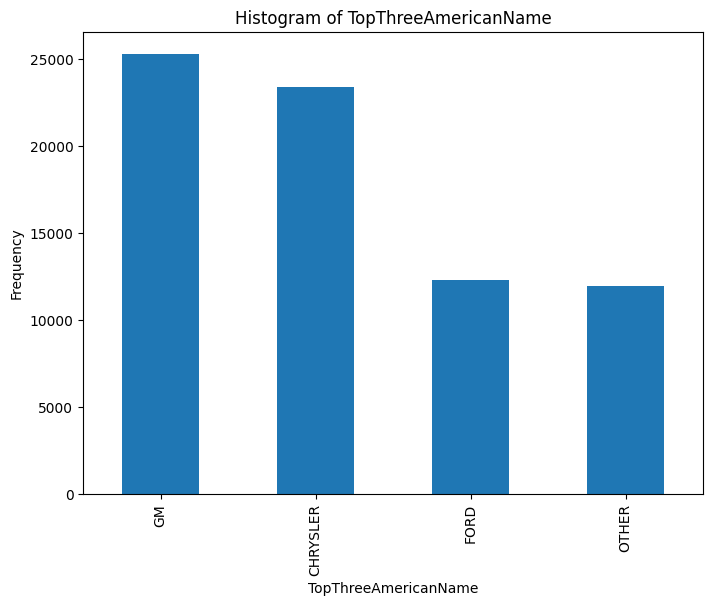

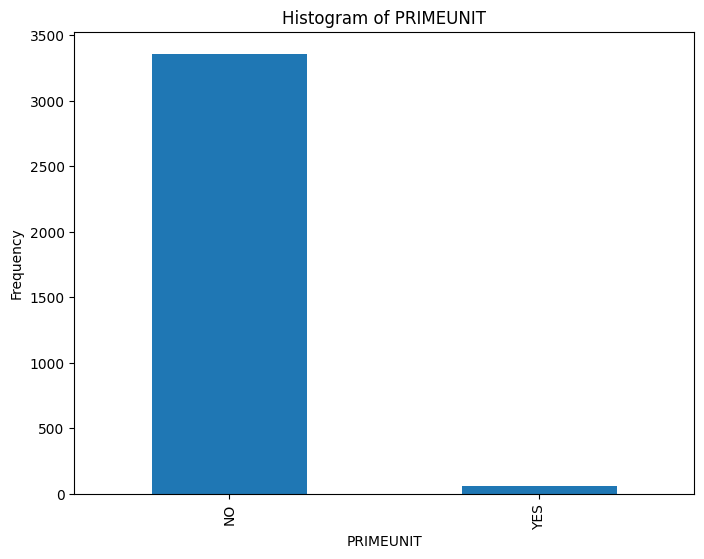

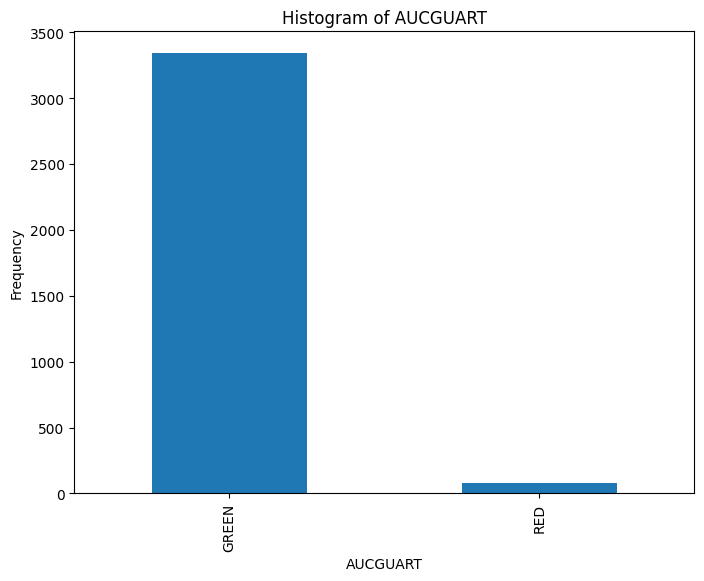

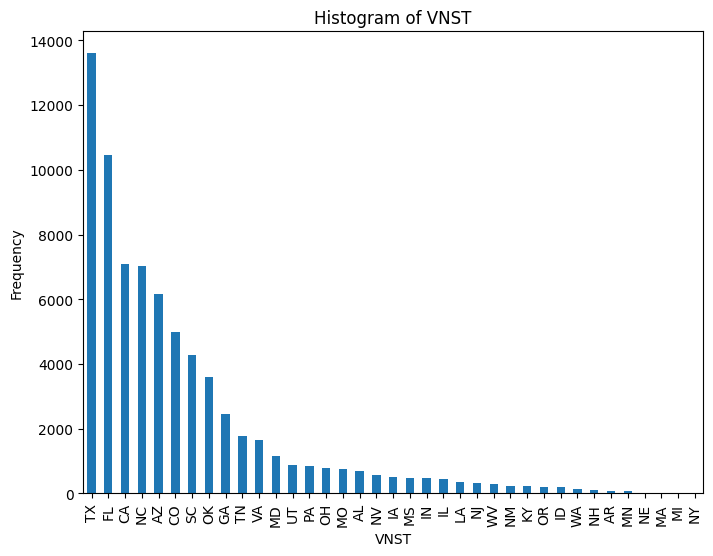

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv("/workspaces/api-open/training.csv")

# Iterate through the columns
for column in df.columns:
    # Check if the column is categorical
    if df[column].dtype == 'object':
        # Plot a histogram for the categorical column
        plt.figure(figsize=(8, 6))
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


In [7]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset into a DataFrame
df = pd.read_csv("/workspaces/api-open/training.csv")

# Preprocessing: Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
    ],
    remainder='passthrough'  # Keep numerical columns
)

# Combine preprocessing with creating heatmap
pipe = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform data
X_transformed = pipe.fit_transform(df)

# Convert csr_matrix to dense array
X_dense = X_transformed.toarray()

# Create DataFrame with transformed data
X_combined_df = pd.DataFrame(X_dense)

# Create heatmap
sns.heatmap(X_combined_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

